In [17]:
!pip install dlib face_recognition imutils opencv-contrib-python

In [1]:
import dlib
import cv2
import face_recognition
import matplotlib.pyplot as plt

print(f"face recognition version = {face_recognition.__version__}")
print(f"open cv version = {cv2.__version__}")
print(f"dli version = {dlib.__version__}")

face recognition version = 1.2.3
open cv version = 4.11.0
dli version = 19.24.9


In [18]:
me = face_recognition.load_image_file("ME/me15.jpeg")
hamid = face_recognition.load_image_file("Hamid/hamid0.jpeg")
face_locations_me = face_recognition.face_locations(me)
face_locations_hamid = face_recognition.face_locations(hamid)
print(face_locations_hamid)
print(face_locations_me)

[(231, 943, 498, 676)]
[(260, 884, 528, 617)]


In [22]:
me_landmark_list = face_recognition.face_landmarks(me)
print(me_landmark_list)

[{'chin': [(600, 333), (603, 370), (608, 408), (615, 444), (629, 478), (650, 508), (681, 531), (717, 546), (757, 550), (795, 544), (828, 527), (854, 504), (873, 472), (884, 436), (889, 398), (891, 359), (891, 318)], 'left_eyebrow': [(625, 300), (640, 276), (667, 266), (695, 268), (721, 278)], 'right_eyebrow': [(757, 276), (782, 265), (810, 262), (838, 271), (856, 291)], 'nose_bridge': [(743, 302), (745, 330), (747, 356), (748, 383)], 'nose_tip': [(716, 398), (732, 404), (748, 408), (764, 403), (777, 396)], 'left_eye': [(657, 311), (672, 299), (690, 299), (707, 311), (690, 313), (672, 314)], 'right_eye': [(778, 309), (794, 296), (812, 296), (828, 307), (813, 311), (795, 311)], 'top_lip': [(694, 448), (715, 440), (733, 436), (747, 439), (762, 435), (779, 437), (800, 441), (792, 442), (762, 442), (747, 445), (733, 444), (702, 447)], 'bottom_lip': [(800, 441), (782, 452), (765, 458), (750, 460), (735, 460), (716, 458), (694, 448), (702, 447), (735, 447), (749, 447), (764, 444), (792, 442)]

In [114]:
import numpy as np

me_encoding = face_recognition.face_encodings(me)[0]

hamid_encoding = face_recognition.face_encodings(hamid)[0]
result = face_recognition.compare_faces([me_encoding], hamid_encoding, tolerance=0.4)

print(result)

[False]


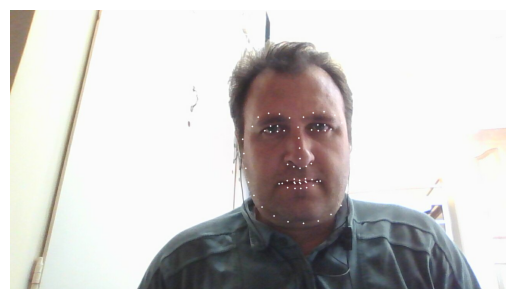

In [118]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

image = face_recognition.load_image_file("ME/me15.jpeg")

face_landmarks = face_recognition.face_landmarks(image)

image_cv = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

for face in face_landmarks:
    for feature in face.keys():
        for point in face[feature]:
            cv2.circle(image_cv, point, 2, (255, 255, 255), -1)

plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [112]:
distance = face_recognition.face_distance([me_encoding], hamid_encoding)
print(f"Face Distance: {distance}")


Face Distance: [0.58801379]


In [125]:
import cv2
import face_recognition
import numpy as np

known_faces = {
    "Abbas": face_recognition.face_encodings(face_recognition.load_image_file("ME/me15.jpeg"))[0],
    "Hamid": face_recognition.face_encodings(face_recognition.load_image_file("Hamid/hamid0.jpeg"))[0]
}

video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(list(known_faces.values()), face_encoding, tolerance=0.4)
        name = "Unknown"

        face_distances = face_recognition.face_distance(list(known_faces.values()), face_encoding)
        best_match_index = np.argmin(face_distances)

        if matches[best_match_index]:
            name = list(known_faces.keys())[best_match_index]

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

        cv2.putText(frame, name, (left, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow('Face Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread (0xc144d40).
Cannot move to target thread (0xb3a6560)

QObject::moveToThread: Current thread (0xb3a6560) is not the object's thread